In [4]:
from sklearn.datasets import make_regression
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [9]:
x,y=make_regression(n_samples=100,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=30,
    random_state=10,)

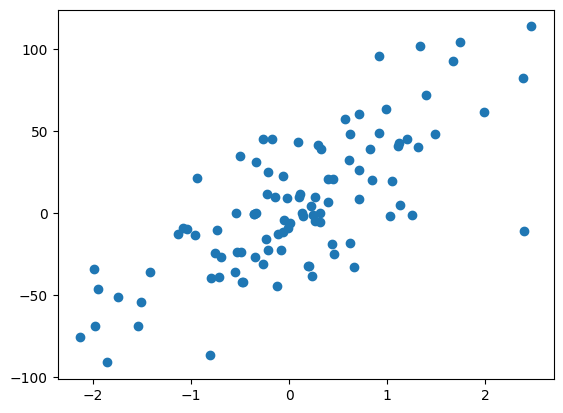

In [10]:
plt.scatter(x,y)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
x_train.shape,x_test.shape

((80, 1), (20, 1))

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[31.00303984]
1.8107130625283192


In [19]:
y_pred=lr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7631824144956161

In [20]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,x,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*x.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*x.ravel() - self.b)*x.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,x):
        return self.m * x + self.b

In [22]:
gd=GDRegressor(0.001,50)

In [23]:
gd.fit(x_train,y_train)

31.07443370767988 1.7492200256631714


In [24]:
y_pred=gd.predict(x_test)
r2_score(y_test,y_pred)

0.76367610986553